# Ejercicios de laboratorio N◦ 1: Resolución de EDOs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

In [49]:
def Euler(a, b, N, F, X0):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    X = np.zeros(t.size)
    X[0] = X0

    for i in range(N):
        X[i + 1] = X[i] + h * F(t[i], X[i])

    return t, X

def EulerVectorial(a,b,N,F,X0):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    X = np.zeros((X0.shape[0],t.size))
    X[:,0] = X0

    for i in range(N):
        X[:,i + 1] = X[:,i] + h * F(t[i], X[:,i])

    return t, X


def RungeKutta(a, b, n, F, Y0):
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    y = np.zeros((Y0.shape[0], n + 1))
    y[:, 0] = Y0

    for i in range(1, n + 1):
        K1 = F(t[i - 1], y[:, i - 1])
        K2 = F(t[i - 1]+ h, y[:, i - 1] + h * K1)
        y[:, i] = y[:, i - 1] + h * (0.5 * K1 + 0.5 * K2)

    return t, y

def RungeKuttaGen(a,b,n,F,Y0,alp,A1,A2):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = Y0

    for i in range(n-1):
        K1 = F(t[i], y[:,i])
        K2 = F(t[i]+alp*h, y[:,i]+alp*h*K1)
        y[:,i+1] = y[:,i] + h*(A1*K1+A2*K2)

    return (t, y)

def Heun(a, b, N, F, y0):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    y = np.zeros((2, N + 1))
    y[:, 0] = y0

    for k in range(1, N + 1):
        K1 = F(t[k - 1], y[:, k - 1])
        K2 = F(t[k - 1] + (2 / 3) * h, y[:, k - 1] + (2 / 3) * h * K1)
        y[:, k] = y[:, k - 1] + (K1 + 3 * K2) * h / 4

    return t, y


def Heun_1var(a,b,N,F,y0):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0

    for k in range(1, N + 1):
        K1 = F(t[k - 1], y[k - 1])
        K2 = F(t[k - 1] + (2 / 3) * h, y[k - 1] + (2 / 3) * h * K1)
        y[k] = y[k - 1] + (K1 + 3 * K2) * h / 4

    return t, y

#Ojo: definir tau antes de usar
tau=0
def EulerDelay(a, b, n, F, N0):
    h = (b-a)/n
    t = np.linspace(a, b, n+1)
    N = np.zeros(n+1)

    for i in range(n+1):
        if t[i]<0:
            N[i] = N0
        else:
            N[i] = N[i-1] + h*F(t[i-1], N[i-1], N[int(i-1-tau/h)])

    return t, N

## Ejercicio 1

Consideremos la ecuación:
 y(t) = λy
 y(0) = 1 ,
 1. Resolver utilizando el m´etodo de Euler para distintos valores de λ y de h. Incluir valores positivos
 y negativos y de m´odulo peque˜no y grande de λ.
 2. Para cada λ, graficar las soluciones arrojadas por distintos valores de h. ¿Qu´ e se observa?
 3. Elegir una combinaci´on de h y λ en donde los resultados sean malos. Graficar conjuntamente la
 soluci´on arrojada por el m´ etodo de Euler para el dato inicial y(0) = 1 y las soluciones exactas
 para distintos datos iniciales. Interpretar

In [4]:
def ej_1(lmbda, divisiones):
    def F1(t,y):
        return lmbda*y

    t,Y= Euler(a=0,b=5,N=divisiones,F=F1,X0=1)

    plt.plot(t,Y)
    plt.show()


interact(
    ej_1,
    lmbda=FloatSlider(value=1, min=-50, max=50, step=1, description='λ'),
    divisiones=IntSlider(value=30, min=1, max=50, step=1, description='divisiones')
)

interactive(children=(FloatSlider(value=1.0, description='λ', max=50.0, min=-50.0, step=1.0), IntSlider(value=…

<function __main__.ej_1(lmbda, divisiones)>

A medida que bajo el h, la curva exponencial se curva menos alcanzando valores más bajos. Para un lambda alto, que explota más rapido, valores bajos de h dan soluciones totalmente alejadas de la original.

## Ejercicio 2

In [ ]:
# #tasa de crecimiento
# r=3
# #capacidad de carga
# K=100
# #poblacion inicial
# P0=2


def ej_2(P0, r, K):
    def F2(t,P):
        return r*P*(1-(P/K))
    
    t,Y=Euler(a=0,b=100,N=10000,F=F2,X0=P0)

    plt.plot(t,Y)
    plt.show()

interact(
    ej_2,
    P0=FloatSlider(value=20, min=0, max=150, step=1, description='poblacion inicial'),
    r=FloatSlider(value=1, min=-1, max=3, step=0.01, description='tasa crecimiento'),
    K=FloatSlider(value=100, min=100, max=1000, step=10, description='capacidad de carga')
)




interactive(children=(FloatSlider(value=20.0, description='poblacion inicial', max=150.0, step=1.0), FloatSlid…

<function __main__.ej_2(P0, r, K)>

No importa si arranco con más o menos población que la capacidad de carga, siempre que la tasa de crecimiento sea positiva, la población tiende a estabilizarse en el maximo impuesto por la capacidad de carga. Pero si la tasa de crecimiento es negativa y arranco con menos poblacion de la capacidad de carga, se estabiliza en 0, es decir se extingue la población. Cuando supero la poblacion de carga como dato inicial, me hace OverFlow para calcular r*P*(1-(P/K))

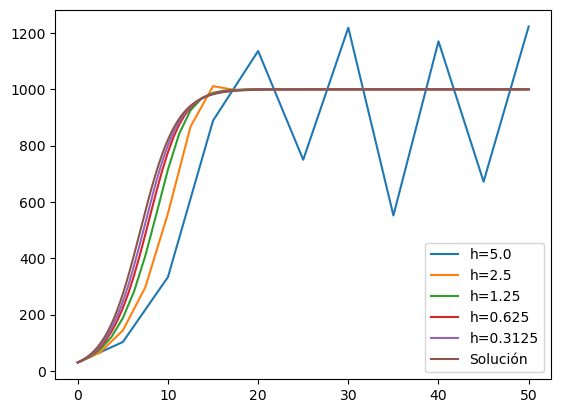

In [6]:
#Solucion original vs aproximaciones variando h
K=1000
P0=30
r=0.5

#funcion derivada
def F2(t,P):
    return r*P*(1-(P/K))

#funcion exacta
def f(t):
    return K/(1+((K-P0)/P0)*np.exp(-r*t))


def ej_2b(divisiones):
    t,Y=Euler(a=0,b=50,N=divisiones,F=F2,X0=P0)
    h=50/divisiones
    plt.plot(t,Y,label=f"h={h}")

N=[10,20,40,80,160]

for div in N:
    ej_2b(div)

#para graficar la original, divido mi dominio en 1000 (h=0.05) y aplico f
t = np.linspace(0, 50, 1000)
plt.plot(t,f(t),label="Solución")


plt.legend()
plt.show()

Vemos como a medida que achicamos h se acerca más a la solución original

## Ejercicio 3

In [7]:
def r(t):
    return 0.2 + 0.2 * np.cos(2* np.pi * t)

K = 1000
m = 0.1

def F3(t, Y):
    return r(t)* Y * (1-Y/K) - m * Y

r es la tasa de crecimiento que tiene una constante sumado a un coseno que llega a anular esa tasa de forma periódica, representando quizas la reproduccion por estaciones de la especie. K es la capacidad de carga, es decir cuantos ejemplares como máximo habrán. m es la cosecha de esa especie, la tasa de mortandad

Tiempo en años, h = 1/365 (un día). Luego N que es cantidad de divisiones debe ser la cantidad de días en 50 años: 18250. Valores de población inicial: 100, 500 y 1000

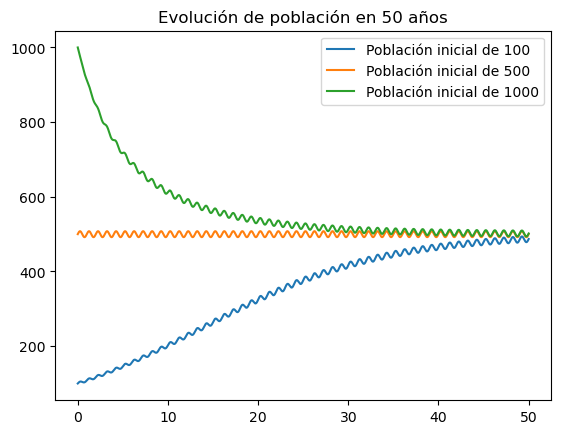

In [8]:
def ej_3(y_0):
    t, y = Heun_1var(a=0,b=50,N=18250,F=F3,y0=y_0)
    plt.plot(t,y, label=f"Población inicial de {y_0}")

Y0=[100,500,1000]

for valor_inicial in Y0:
    ej_3(valor_inicial)

plt.title("Evolución de población en 50 años")
plt.legend()
plt.show()

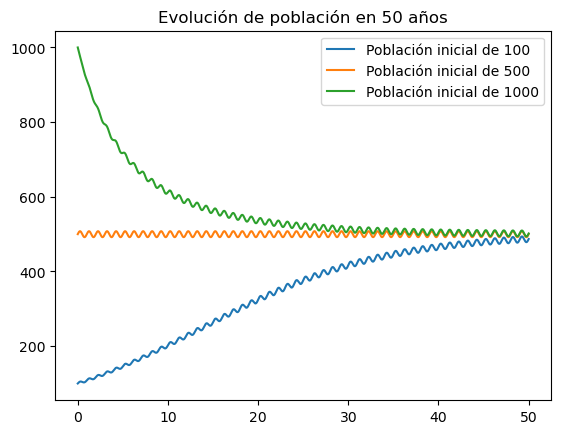

In [9]:
def ej_3(y_0):
    t, y = Heun(a=0,b=50,N=18250,F=F3,y0=y_0)
    plt.plot(t,y[0], label=f"Población inicial de {y_0}")

Y0=[100,500,1000]

for valor_inicial in Y0:
    ej_3(valor_inicial)

plt.title("Evolución de población en 50 años")
plt.legend()
plt.show()

## Ejercicio 4

Resuelto al principio para k=2. La matriz Y que devuelve nos da en tiempo 'columna' la solucion por cada ecuacion diferencial en cada 'fila'. Con Heun lo dejamos en 2 ecuaciones nada más.

## Ejercicio 5

se asume velocidad positiva cuando apunta hacia abajo

a) resolver ecuación para distintas velocidades iniciales

In [10]:
def FV(t,v):
    return 9.81 - ((0.028/0.084)*(v**2))

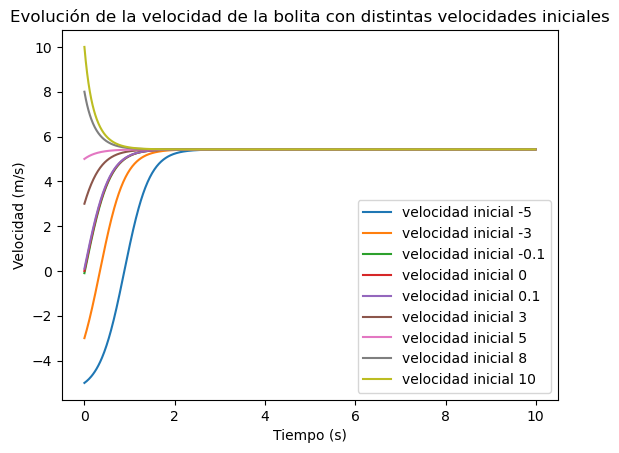

In [71]:
V0= [-5,-3,-0.1,0,0.1,3,5,8,10]

for v0 in V0:
    t, v = RungeKuttaGen(0,10,1000,FV,np.array([v0]),1,0.5,0.5)
    #t, v = RungeKutta(0,10,1000,FV,np.array([v0]))
    plt.plot(t,v[0],label=f"velocidad inicial {v0}")

plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (m/s)")
plt.title("Evolución de la velocidad de la bolita con distintas velocidades iniciales")
plt.legend()
plt.show()

Las velocidades, no importa donde arranquen tienden a estabilizarse alrededor de 5, es decir caen con velocidad constante.

Ahora agregamos posicion

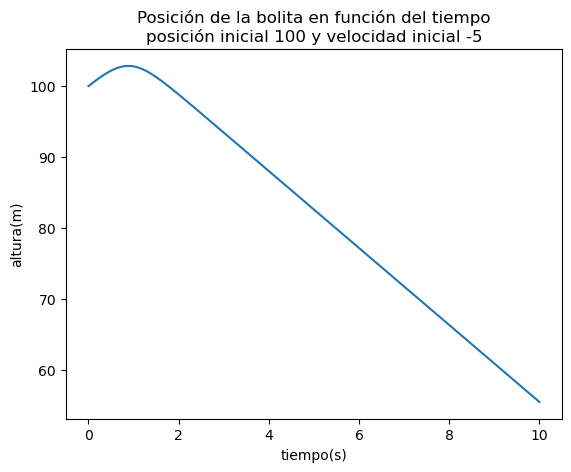

In [51]:
def F5(t,Y):
    x,v=Y

    dxdt=-v
    dvdt=FV(t,v)

    return np.array([dxdt,dvdt])

x0=100
v0=-5

Y0=np.array([x0,v0])

t,Y=RungeKutta(0,10,1000,F5,Y0)

plt.plot(t,Y[0])
plt.title(f"Posición de la bolita en función del tiempo\nposición inicial {x0} y velocidad inicial {v0}")
plt.xlabel("tiempo(s)")
plt.ylabel("altura(m)")
plt.show()

Vemos como sube y baja con aceleración y luego se estabiliza en una lineal porque la velocidad pasa a ser constante

## Ejercicio 6

$x'= -ax + gxy$

$y'= by - dxy$

In [53]:
a=0.5
b=0.5
g=0.5
d=0.5

In [54]:
def F6(t,X):
    x,y=X
    dxdt=-a*x+g*x*y
    dydt=b*y-d*x*y
    return np.array([dxdt,dydt])

def ej6_2(x0,y0):
    X0=np.array([x0,y0])

    t,X=RungeKutta(0,100,1000,F6,X0)

    plt.plot(t,X[0],label="Predadores")
    plt.plot(t,X[1],label="Presas")
    plt.title("Presas y Predadores respecto del tiempo")
    plt.xlabel("tiempo")
    plt.ylabel("número de ejemplares")
    plt.legend()
    plt.show()

    plt.plot(X[0],X[1])
    plt.title("Presas respecto de predadores")
    plt.xlabel("Predadores")
    plt.ylabel("Presas")
    plt.show()


interact(
    ej6_2,
    x0=FloatSlider(value=1, min=0, max=5, step=0.01, description='predadores iniciales'),
    y0=FloatSlider(value=1, min=0, max=5, step=0.01, description='presas iniciales')
)

interactive(children=(FloatSlider(value=1.0, description='predadores iniciales', max=5.0, step=0.01), FloatSli…

<function __main__.ej6_2(x0, y0)>

Las presas respecto de los depredadores queda siempre una curva cerrada, mostrando que las soluciones son periodicas y quedan evidenciado en el grafico de presas y predadores respecto del tiempo, las soluciones son periodicas. En el (1,1) vemos un centro que es un punto de equilibrio, mientras que en el (0,0) parecería más ser una silla.

Otros valores de tasas y un set de valores iniciales específico:

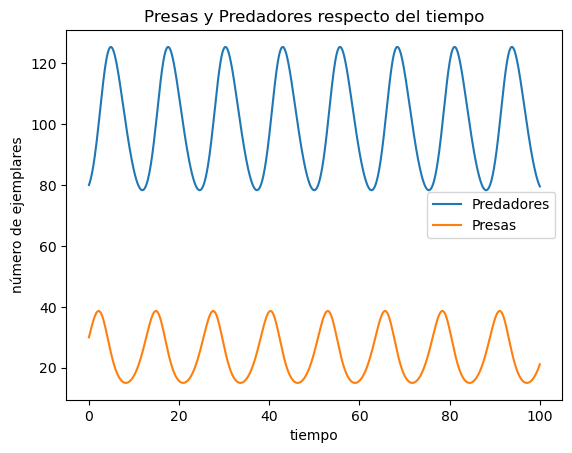

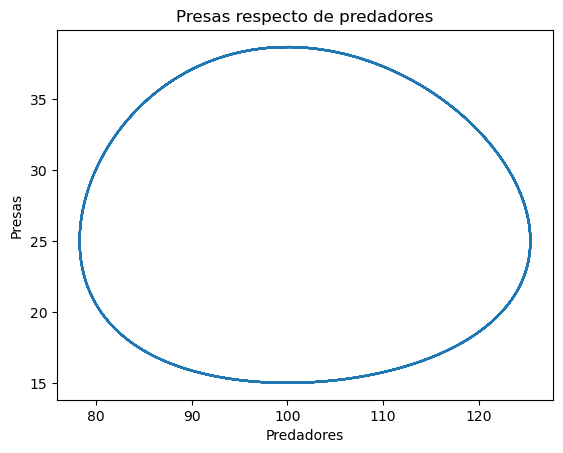

In [55]:
a=0.25
b=1
g=0.01
d=0.01

ej6_2(80,30)

Acá vemos devuelta una solución periódica y un equilibrio en (25,100) que es un centro

## Ejercicio 7

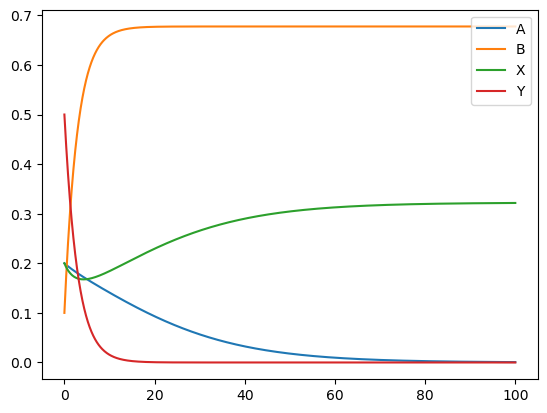

In [56]:
k1=0.2
k2=0.3
k3=0.4

def F7(t,ABXY):
    a,b,x,y=ABXY
    dxdt=k1*x*a-k2*x*y
    dydt=k2*x*y-k3*y
    dadt=-k1*a*x
    dbdt=k3*y
    return np.array([dadt,dbdt,dxdt,dydt])

Y0=np.array([0.2,0.1,0.2,0.5])

t,Sol=RungeKutta(0,100,1000,F7,Y0)

plt.plot(t,Sol[0], label="A")
plt.plot(t,Sol[1], label="B")
plt.plot(t,Sol[2], label="X")
plt.plot(t,Sol[3], label="Y")
plt.legend(loc='upper right')
plt.show()

Vemos que la reacción se estabiliza después de un tiempo

## Ejercicio 8

[]

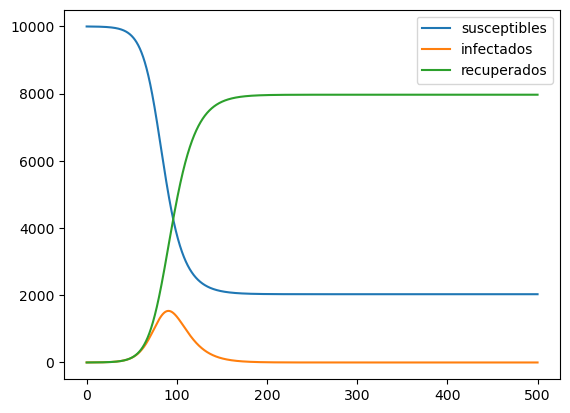

In [57]:
b=0.2
g=0.1
n=10000

def F8(t,SIR):
    s,i,r=SIR
    dsdt=-b*s*i/n
    didt=b*s*i/n-g*i
    drdt=g*i
    return np.array([dsdt,didt,drdt])

y0=np.array([9999,1,0])

t,Sol=RungeKutta(0,500,10000,F8,y0)

plt.plot(t,Sol[0],label="susceptibles")
plt.plot(t,Sol[1],label="infectados")
plt.plot(t,Sol[2],label="recuperados")
plt.legend()
plt.plot()

## Ejercicio 9

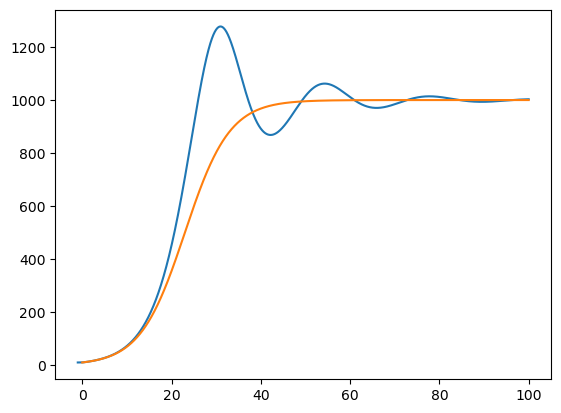

In [18]:
r=0.2
K=1000

def F9(t,N,N_tau):
    return r*N*(1-(N_tau/K))

tau=5
t,Sol=EulerDelay(-1,100,10000,F9,10)


plt.plot(t,Sol)
ej_2(10,0.2,1000)

Te puede pasar con delay que la poblacion supere la capacidad de carga de a momentos, pero tiende igual a estabilizarse en K

## Ejercicio 14

In [19]:
alpha, delta, epsilon, k1, k2 = [None for i in range(5)]

# Método con factor de competencia intra-especie
def ej14_i(t, XY):
    x, y = XY
    dxdt = -alpha * x + gamma * x * y
    dydt = beta * y - delta * x * y - epsilon * y**2
    return np.array([dxdt, dydt])

Interpretación de los parámetros:

alfa: tasa de mortalidad de la especie x

gamma: factor de competencia entre ambas especies (suponiendo que gamma>0, entonces es beneficioso para la especie x, que es la del depredador)

beta: tasa de natalidad de la especie y

delta: factor de competencia entre ambas especies (suponiendo que delta>0, entonces es contraproducente para la especie y, que es la presa)

epsilon: factor de competencia intra-especie de y

In [20]:
# Método de Holling
def ej14_ii(t, XY):
    x, y = XY
    dxdt = - alpha * x + gamma * x * y / (1 + k1 * y)
    dydt = beta * y - delta * x * y / (1 + k2 * y)
    return np.array([dxdt, dydt])

Interpretación de los parámetros:

alfa: tasa de mortalidad de la especie x

gamma: factor de competencia entre ambas especies (suponiendo que gamma>0, entonces es beneficioso para la especie x, que es la del depredador)

k1: factor que modula la eficiencia de la "caza" por parte de los depredadores. Si pensamos que la densidad de las presas es muy alta, entonces el término completo de competencia entre especies se vuelve mas chico. Si, por el contrario, hay menos presas, la capacidad de caza por parte de los depredadores aumenta.

beta: tasa de natalidad de la especie y

delta: factor de competencia entre ambas especies (suponiendo que delta>0, entonces es contraproducente para la especie y, que es la presa)

k2: cumple el mismo rol que k1, pero en la ecuación de las presas. Cuanta mayor densidad hay, menor es el impacto de la depredación.

## Ejercicio 15

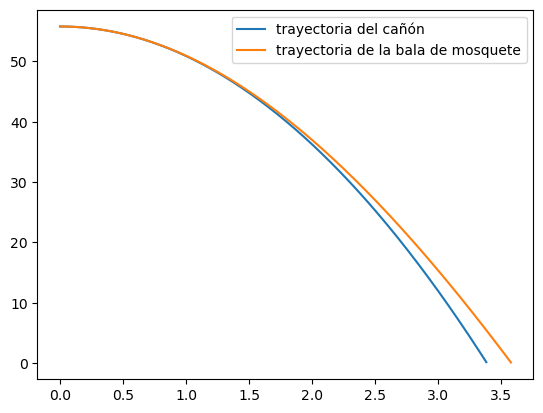

In [58]:
def F15(t,XCVCXMVM):
    xc,vc,xm,vm=XCVCXMVM

    dxcdt=-vc
    dvcdt=9.81-(0.0058/16)*(vc**2)

    dxmdt=-vm
    dvmdt=9.81-(0.0000374/0.0058)*(vm**2)

    return np.array([dxcdt,dvcdt,dxmdt,dvmdt])

Y0=np.array([55.8,0,55.8,0])

t,Sol=RungeKutta(0,5,1000,F15,Y0)

cañon = None
t_cañon = None
t_fin_cañon = 0

for i in range(Sol[0].size):
    if Sol[0][i]<0:
        cañon = Sol[0][:i]
        t_cañon = t[:i]
        t_fin_cañon = t[i-1]
        break

bala = None
t_bala = None
t_fin_bala = 0
for i in range(Sol[2].size):
    if Sol[2][i]<0:
        bala = Sol[2][:i]
        t_bala = t[:i]
        t_fin_bala = t[i-1]
        break

plt.plot(t_cañon,cañon,label="trayectoria del cañón")
plt.plot(t_bala,bala,label="trayectoria de la bala de mosquete")
plt.legend()
plt.show()

In [59]:
print(f"El cañon tarda {t_fin_cañon} segundos en tocar el suelo y la bala {t_fin_bala} segundos")
altura=bala[cañon.size -1]
print(f"La bala estaba a {altura} metros del piso cuando el cañon toco el suelo")

El cañon tarda 3.38 segundos en tocar el suelo y la bala 3.575 segundos
La bala estaba a 5.443586777267827 metros del piso cuando el cañon toco el suelo


## Ejercicio 16

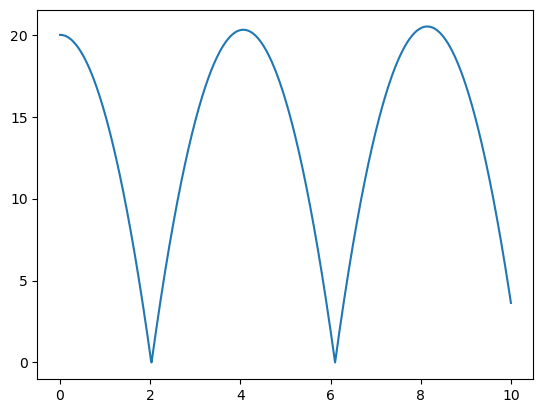

In [23]:
def F16(t,X):
    x,v=X
    dxdt=v
    dvdt=-9.81
    return np.array([dxdt,dvdt])

def EulerRebota(a,b,N,F,X0,energia_conservada):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    X = np.zeros((X0.shape[0],t.size))
    X[:,0] = X0

    for i in range(N):
        X[:,i + 1] = X[:,i] + h * F(t[i], X[:,i])
        if X[0,i+1]<0:
            #rebota
            X[0,i+1]=0 #corregimos posicion
            X[1,i+1]=-X[1,i+1]*energia_conservada #corregimos velocidad

    return t, X

X0=np.array([20,0])

t,Sol = EulerRebota(0,10,1000,F16,X0,1)

plt.plot(t,Sol[0])
plt.show()

Observación: con la corrección lo que sucede es que damos vuelta la velocidad y cada vez llega con una velocidad más alta al piso lo que al extender el período que la dejamos saltar empieza a llegar más alto, porque le da tiempo a la gravedad para aumentar la velocidad en modulo. Esto sucede de manera retroalimentativa.

Ahora, con pérdida de energía

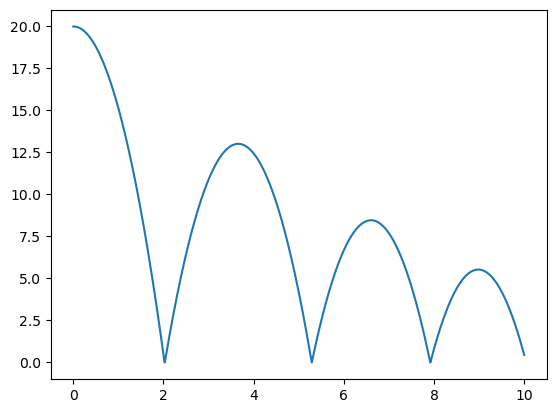

In [24]:
t,Sol = EulerRebota(0,10,1000,F16,X0,0.8)

plt.plot(t,Sol[0])
plt.show()

## Ejercicio 19

Oscilador armónico amortiguado:

$mx''+bx'+kx=f(t,x)$

Inciso uno analizar para distintos discriminantes. Pruebo con f constante 0. Recordar discriminante = $b^2-4mk$

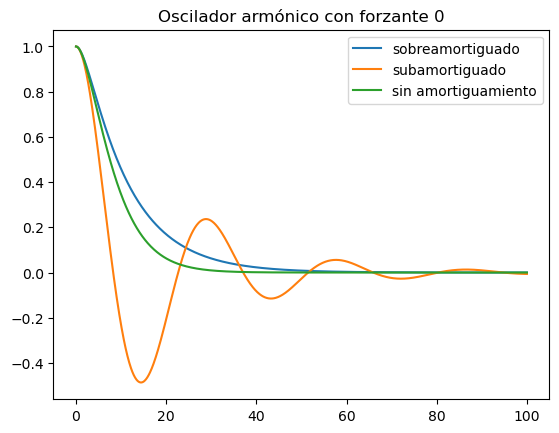

In [61]:
b=1.2
k=0.1
m=2

def F19(t,X):
    x1,x2=X
    dx1dt=x2
    dx2dt=(-b*x2-k*x1)/m
    return np.array([dx1dt,dx2dt])

Y0=np.array([1,0])

t,Sol=RungeKutta(0,100,1000,F19,Y0)
plt.plot(t,Sol[0], label="sobreamortiguado")

b=0.2
k=0.1
m=2
t,Sol=RungeKutta(0,100,1000,F19,Y0)
plt.plot(t,Sol[0], label="subamortiguado")

b=np.sqrt(4*2*0.1)
k=0.1
m=2
t,Sol=RungeKutta(0,100,1000,F19,Y0)
plt.plot(t,Sol[0], label="sin amortiguamiento")

plt.title("Oscilador armónico con forzante 0")
plt.legend()
plt.show()

Ahora tomamos una forzante periódica, el seno

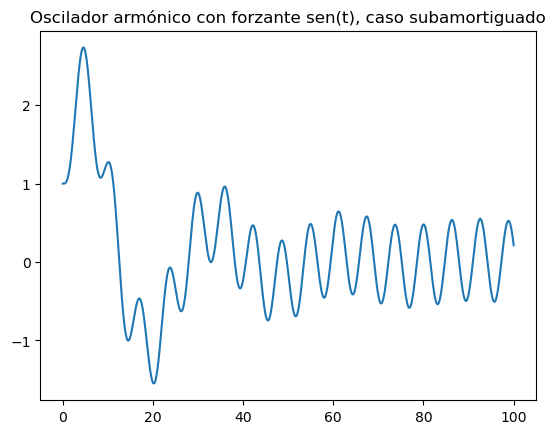

In [62]:
#caso subamortiguado
b=0.2
k=0.1
m=2

#agregamos el forzante
def F19_2(t,X):
    x1,x2=X
    dx1dt=x2
    dx2dt=(np.sin(t)-b*x2-k*x1)/m
    return np.array([dx1dt,dx2dt])

t,Sol=RungeKutta(0,100,1000,F19_2,Y0)
plt.plot(t,Sol[0])
plt.title("Oscilador armónico con forzante sen(t), caso subamortiguado")
plt.show()

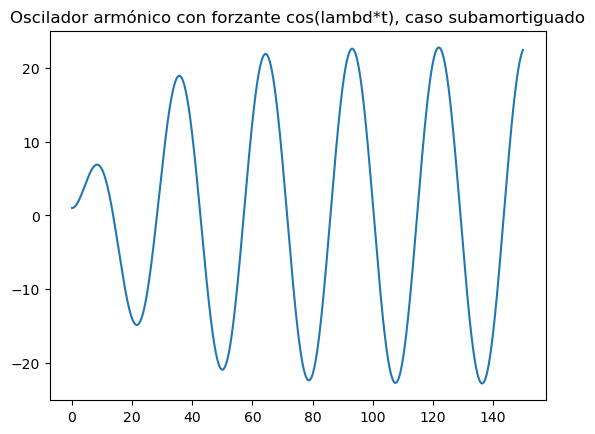

In [63]:
#cambiamos el forzante
lmbda= np.sqrt(4*m*k-(b**2))/(2*m)

#agregamos el forzante
def F19_3(t,X):
    x1,x2=X
    dx1dt=x2
    dx2dt=(np.cos(lmbda*t)-b*x2-k*x1)/m
    return np.array([dx1dt,dx2dt])

t,Sol=RungeKutta(0,150,10000,F19_3,Y0)
plt.plot(t,Sol[0])
plt.title("Oscilador armónico con forzante cos(lambd*t), caso subamortiguado")
plt.show()

tiene un rango de oscilacion mucho mayor y sin perturbaciones

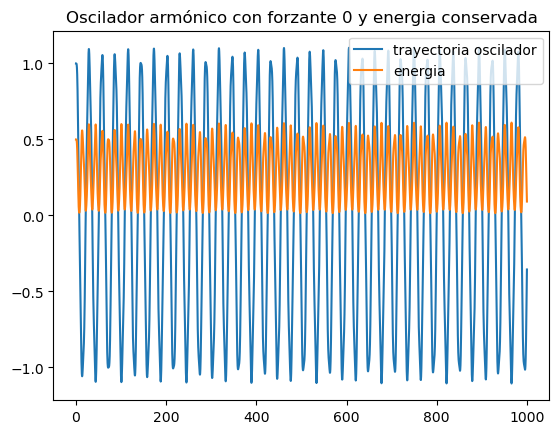

In [64]:
b=0
m=1
k=1

def F19_4(t,X):
    x1,x2=X
    dx1dt=x2
    dx2dt=(-b*x2-k*x1)/m
    return np.array([dx1dt,dx2dt])

def energia_oscilador(x1,x2):
    return 1/2*k*(x1**2)+1/2*m*(x2**2)

t,Sol=RungeKutta(0,1000,10000,F19_3,Y0)
plt.plot(t,Sol[0], label="trayectoria oscilador")
plt.plot(t,energia_oscilador(Sol[0],Sol[1]),label="energia")
plt.title("Oscilador armónico con forzante 0 y energia conservada")
plt.legend()
plt.show()

vemos que la energia que deberia mantenerse constante no lo hace, puede deberse a que estamos aproximando las soluciones

## Ejercicio 20

In [ ]:
def ej_20(mu):

    def F20(t, x):
        return mu-x**2
    
    t_vals = np.linspace(-10, 10, 30)
    x_vals = np.linspace(-10, 10, 30)
    T, X = np.meshgrid(t_vals, x_vals)  
    U = F20(T, X)

    plt.streamplot(T, X, T, U, density=0.8, broken_streamlines=False)
    plt.grid()
    plt.show()

interact(
    ej_20,
    mu = FloatSlider(value = 0, min = -5, max = 5, step = 0.1)
    )

interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0), Output()), _dom_classes=('w…

<function __main__.ej_20(mu)>

Para mu positivos vemos un punto de equilibrio inestable (silla) en (0,mu) y en (0,-mu) tambien inestable (nodo)

Cuando mu es 0 queda un unico punto de equilibrio

## Ejercicio 21

In [33]:
def ej_21(mu):

    def F21(t,X):
        x1,x2=X
        dx1dt=x2
        dx2dt=mu*(1-x1**2)*x2+x1
        return np.array([dx1dt,dx2dt])

    x1_vals = np.linspace(-5, 5, 1000)
    x2_vals = np.linspace(-5, 5, 1000)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    X=np.array([X1,X2])
    DX1,DX2 = F21(t,X)

    plt.streamplot(X1, X2, DX1, DX2, density=1, broken_streamlines=False)
    plt.title(f"Diagrama de fases sistema van der pool con mu {mu}")
    plt.show()



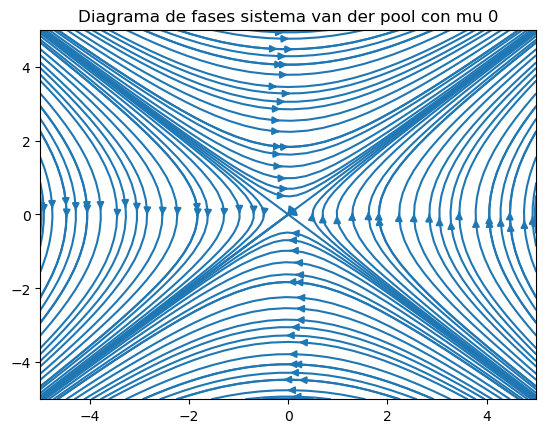

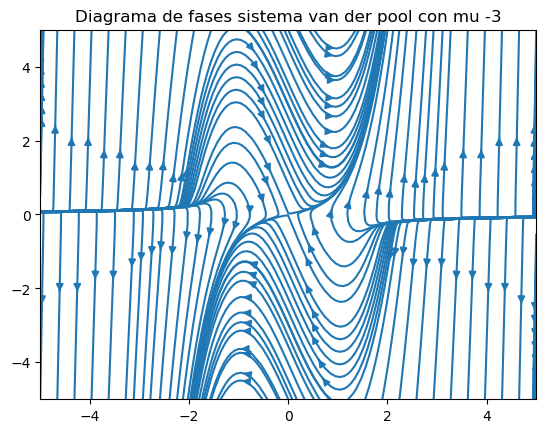

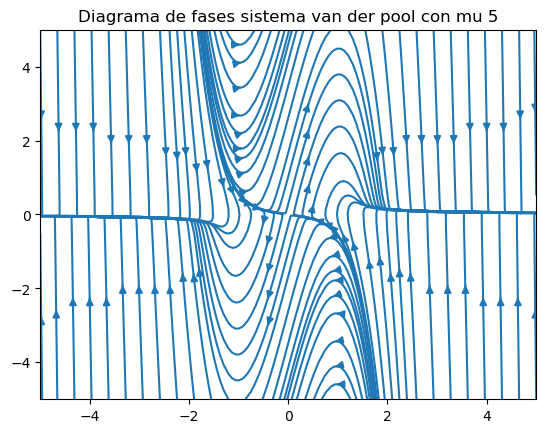

In [34]:
ej_21(0)
ej_21(-3)
ej_21(5)

Analizamos el equilibrio en (0,0) donde el oscilador se queda quieto. Para ningun valor es estable, en todos es una silla. Cuando $\mu$ vale 0, a menos que arranque en el equilibrio, el sistema tiene a infinito en velocidad y posicion o a menos infinito. Lo que si vemos es que a partir de posiciones que esten a mas del modulo de $\mu$ de distancia de 0 hay un comportamiento particular para los $\mu$ positivos y negativos.

$\mu$ positivo:<br>
la velocidad cae a 0 y la x tiende a mas o menos infinito segun su signo

$\mu$ negativo:<br>
la velocidad se va a mas infinito o menos infinito segun su signo


## Ejercicio 21 bis

In [42]:
A=3

def ej_21_bis(b):
    def F21_bis(t,X):
        tita,vel=X
        dtitadt=vel
        dveldt=-A*np.sin(tita)-b*vel
        return np.array([dtitadt,dveldt])
    
    tita_vals = np.linspace(-10, 10, 1000)
    vel_vals = np.linspace(-10, 10, 1000)
    tita, vel = np.meshgrid(tita_vals, vel_vals)
    X=np.array([tita,vel])
    DTita,DVel = F21_bis(t,X)

    plt.streamplot(tita, vel, DTita, DVel, density=1.2)
    plt.title(f"Diagrama de fases sistema pendulo con b {b}")
    plt.show()

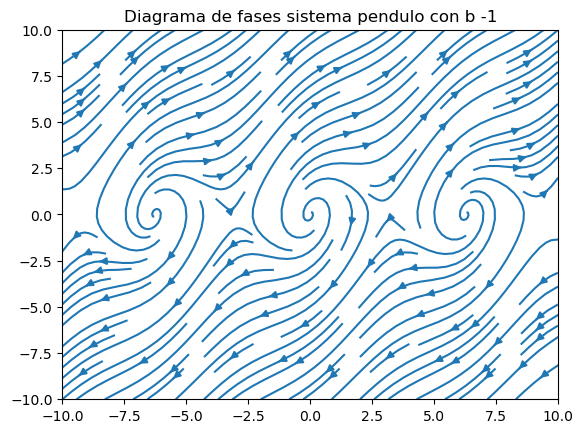

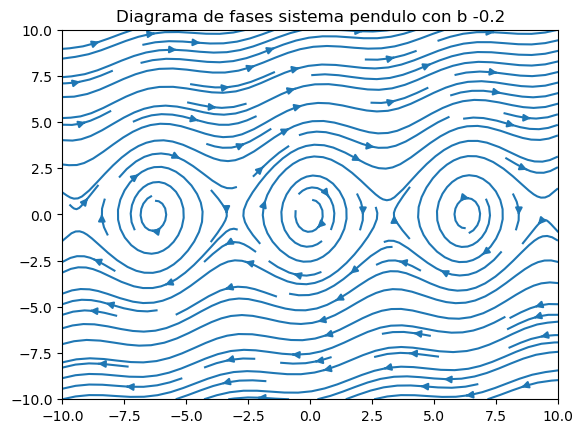

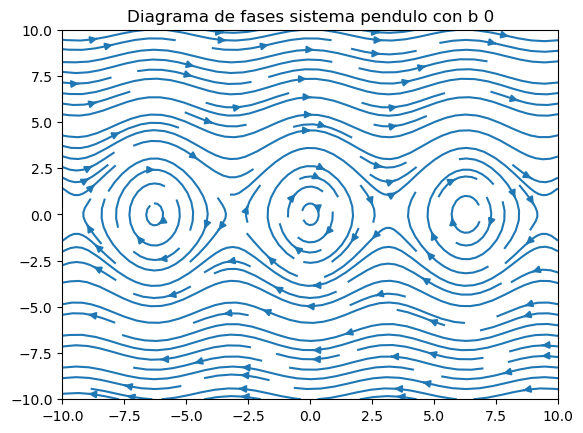

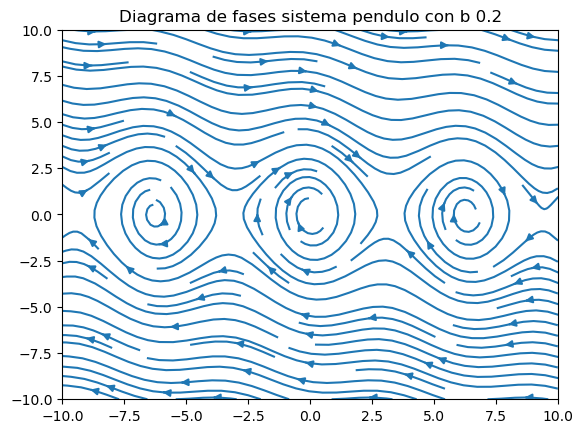

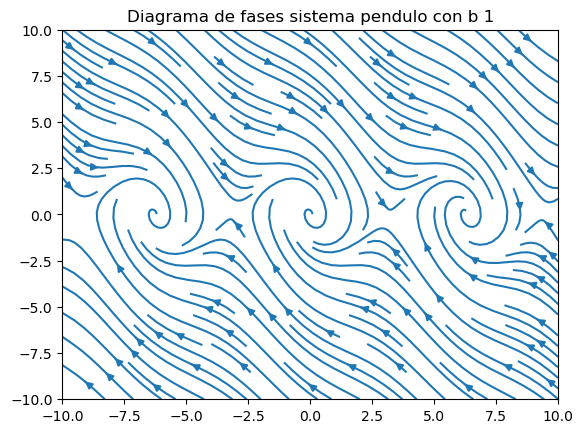

In [43]:
ej_21_bis(-1)
ej_21_bis(-0.2)
ej_21_bis(0)
ej_21_bis(0.2)
ej_21_bis(1)

con b = 0 se queda oscilando, tenemos soluciones periodicas y las que no lo son giran eternamente porque pasan por k*2 $\pi$

Con b positivo es un foco estable y con b negativo inestable. Esto representaria algun tipo de rozamiento puesto que b esta restando y si es positivo el sistema pierde energia y se estabiliza en algun multiplo de 2 $\pi$ lo que es logico pues el pendulo se queda quieto. Si el rozamiento es negativo, se le inyecta energia al sistema lo que hace que crezca infinitamente en el modulo la velocidad.

## Ejercicio 22

In [65]:
def ej_22(a,b,c,x0,y0,z0):

    def F22(t,X):
        x,y,z=X
        dxdt=-y-z
        dydt=x+a*y
        dzdt=b+x*z-c*z
        return np.array([dxdt,dydt,dzdt])
    
    Y01=np.array([x0,y0,z0])
    t1,Sol1=RungeKutta(0,1000,100000,F22,Y01)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(Sol1[0], Sol1[1], Sol1[2], label='Trayectoria en ℝ³ datos iniciales del problema')
    ax.set_xlabel("x(t)")
    ax.set_ylabel("y(t)")
    ax.set_zlabel("z(t)")
    ax.set_title("Solución en el espacio 3D")
    ax.legend()
    plt.show()

    ultimo=t1.size-1
    Y02=np.array([Sol1[0][ultimo],Sol1[1][ultimo],Sol1[1][ultimo]])
    t2,Sol2=RungeKutta(0,100,100000,F22,Y02)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(Sol2[0], Sol2[1], Sol2[2], label='Trayectoria en ℝ³ con ultimos datos de solucion anterior')
    ax.set_xlabel("x(t)")
    ax.set_ylabel("y(t)")
    ax.set_zlabel("z(t)")
    ax.set_title("Solución en el espacio 3D")
    ax.legend()
    plt.show()

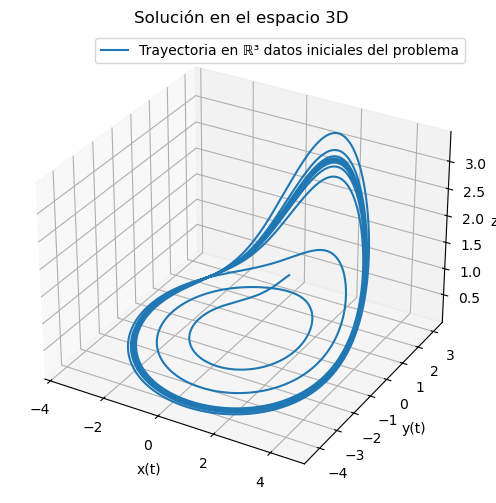

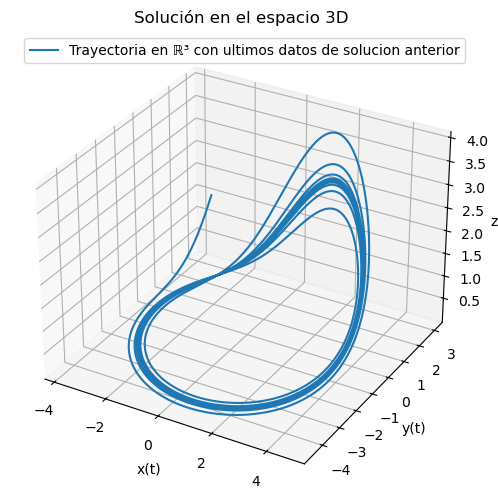

In [66]:
ej_22(0.2,0.2,2.3,1,1,1)

Lo que sucede es que el sistema tendio a estabilizarse en un mismo recorrido y si tomo ese dato final donde se fue a quedar, quedara el ciclo limite mas facil de ver

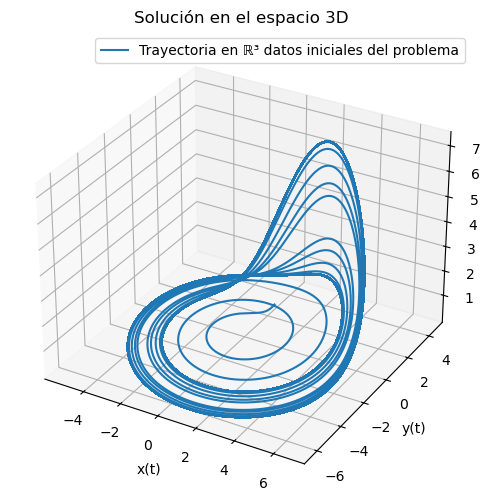

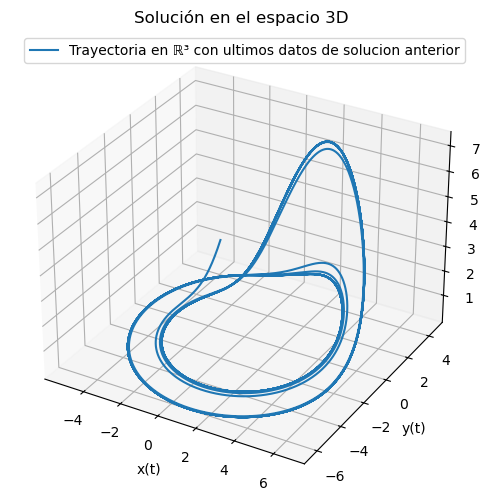

In [67]:
ej_22(0.2,0.2,3.3,1,1,1)

Sucede lo mismo, pero ahora tiene otra forma

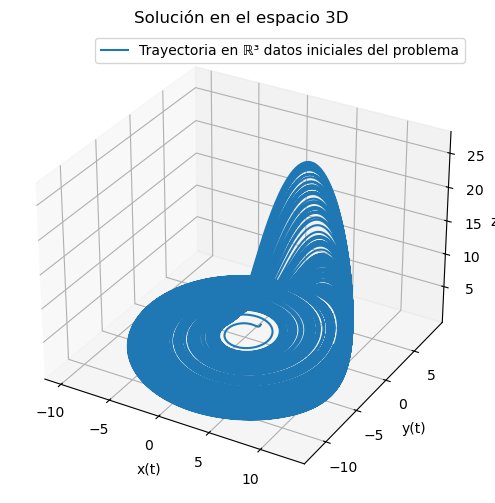

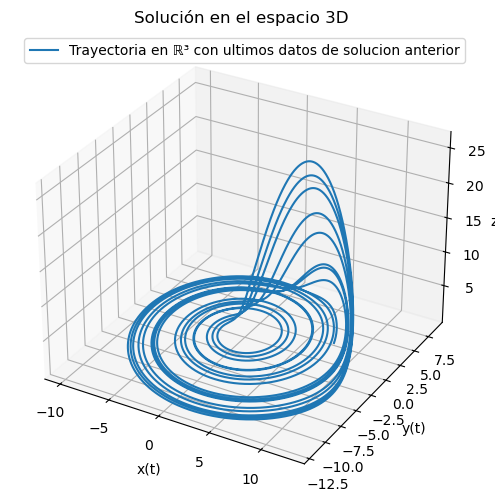

In [68]:
ej_22(0.2,0.2,6.3,1,1,1)

No pareceria ser un ciclo limite, pero puede deberse a el error que arrastra nuestro metodo de aproximacion

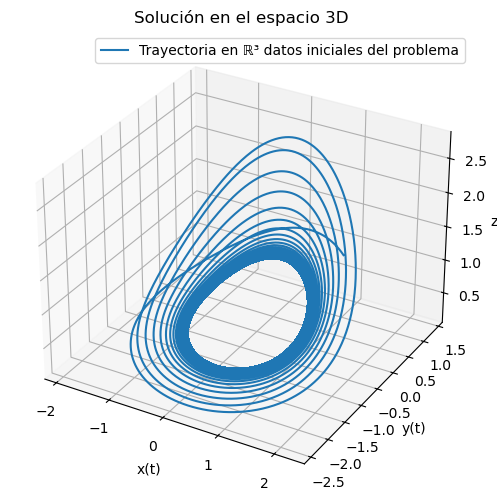

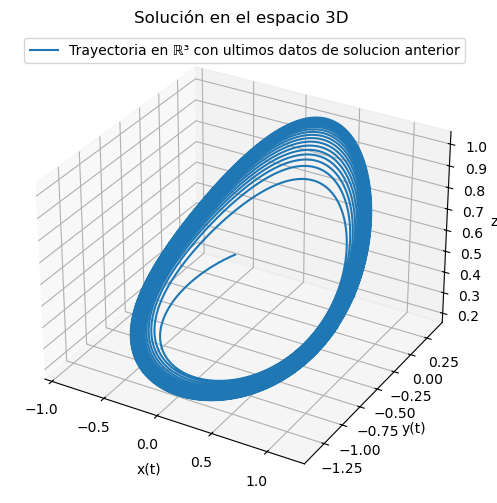

In [69]:
ej_22(0.2,0.2,0.63,1.01,1,1)